<h2 style="text-align: center">Surprise Housing</h2>
<h3 style="text-align: center">Advanced Regression</h3>
<br/>
<div style="text-align: center">
        By:<br/>
        Peter Sharun Woodman M
</div>

### Problem Statement:
- #### To understand and model the price of houses with the available independent variables.
- #### To determine the optimal value of lambda for ridge and lasso regression.
- #### As a data analyst, we need to provide the following details:<br/>
     - Which variables are significant in predicting the price of a house
     - How well those variables describe the price of a house<br/>

### Steps:
- #### Step 1: Import the required libraries
- #### Step 2: Reading and Understanding the Data
- #### Step 3: Data Cleaning
- #### Step 4: Visualising the Data
- #### Step 5: Data Preparation
- #### Step 6: Splitting the Data into Training and Testing Sets
- #### Step 7: Rescaling the features
- #### Step 8: Building a linear model
- #### Step 9: Building model using Ridge Regression
- #### Step 10: Building model using Lasso Regression
- #### Step 12: Final Words
- #### Assignment Part - II 

### Step 1: Import the required libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For numerical calculations and analysis
import numpy as np
import pandas as pd

# Configuration of DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For splitting the data into train and test set
from sklearn.model_selection import train_test_split

# For scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

# For building linear model
import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For finding MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Import CrossValScore, GridSearchCV, Ridge, Lasso from sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso

### Step 2: Reading and Understanding the Data
- #### 2.1: Read the data from excel
- #### 2.2: Inspect the dataframe

-  #### Substep 2.1: Read the data from excel

    Note: Please keep the files to read in the same directory as the current python file

In [2]:
# Importing and reading the database.
sales_df = pd.read_csv("train.csv")

print("Dataframe after importing and reading from the database :")
display(sales_df)

Dataframe after importing and reading from the database :


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

-  #### Substep 2.2: Inspect the dataframe

In [3]:
# Viewing the first 5 records of the dataframe
print("First 5 records of the dataframe:")
display(sales_df.head(5))

# Viewing the last 5 records of the dataframe
print("Last 5 records of the dataframe:")
display(sales_df.tail(5))

First 5 records of the dataframe:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Last 5 records of the dataframe:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
# Viewing the shape of the dataframe
print("Shape of the dataframe:{0}".format(sales_df.shape))
print("\t - Number of rows in the dataframe:{0}".format(sales_df.shape[0]))
print("\t - Number of columns in the dataframe:{0}".format(sales_df.shape[1]))

print('______________________________________________________________________________\n')

# Columns in DataFrame
print("Columns in DataFrame : \n{0}".format(sales_df.columns))

print('______________________________________________________________________________\n')

# Viewing the info about the dataframe
print("Info about dataframe:")
print(sales_df.info())

print('______________________________________________________________________________\n')

# Viewing the general statistical data about the dataframe
print("Describing the dataframe:")
display(sales_df.describe())

Shape of the dataframe:(1460, 81)
	 - Number of rows in the dataframe:1460
	 - Number of columns in the dataframe:81
______________________________________________________________________________

Columns in DataFrame : 
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'K

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 3: Data Cleaning
- #### 3.1: Inspect the null values
- #### 3.2: Drop duplicate values (if any)
- #### 3.3: Handling Null Values
- #### 3.4: Outlier detection

-  #### Substep 3.1: Inspect the null values
    - ##### 3.1.1: Inspecting the column-wise null count and percentage
    - ##### 3.1.2: Inspecting the row-wise null count and percentage

- ##### 3.1.1: Inspecting the column-wise null count and percentage

In [5]:
# Function to calculate column-wise null count and percentage
def calcColWiseNullCount(dataframe):
    # Calculating column-wise null count
    col_null_count_series = dataframe.isnull().sum()

    # Calculating column-wise null percentage
    col_null_perc_series = round(((col_null_count_series / dataframe.shape[0]) * 100), 2)

    # Combining column-wise null count and null percentages
    combined_col_null_df = pd.concat([col_null_count_series, col_null_perc_series], axis=1)

    # Changing column names
    combined_col_null_df.columns = ['Column-wise Null Count', 'Column-wise Null Percentage']

    # Returning the combined dataframe
    return(combined_col_null_df[combined_col_null_df['Column-wise Null Percentage'] > 0])

print("Column-wise null count and percentage (>0):")
display(calcColWiseNullCount(sales_df))

Column-wise null count and percentage (>0):


,Column-wise Null Count,Column-wise Null Percentage
LotFrontage,259,17.74
Alley,1369,93.77
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07


- ##### 3.1.2: Inspecting the row-wise null count and percentage

In [6]:
# Function to calculate row wise null count and percentage
def calcRowWiseNullCount(dataframe):
    # Calculating row-wise null count
    row_null_count_series = dataframe.isnull().sum(axis=1)

    # Calculating column-wise null percentage
    row_null_perc_series = round(((row_null_count_series / dataframe.shape[1]) * 100), 2)

    # Combining column-wise null count and null percentages
    combined_row_null_df = pd.concat([row_null_count_series, row_null_perc_series], axis=1)

    # Changing column names
    combined_row_null_df.columns = ['Row-wise Null Count', 'Row-wise Null Percentage']

    return(combined_row_null_df)

print("Row-wise null count and null percentage:")
display(calcRowWiseNullCount(sales_df))

Row-wise null count and null percentage:


,Row-wise Null Count,Row-wise Null Percentage
0,5,6.17
1,4,4.94
2,4,4.94
3,4,4.94
4,4,4.94
...,...,...
1455,4,4.94
1456,3,3.70
1457,2,2.47
1458,5,6.17


-  #### Substep 3.2: Drop duplicate values (if any)

In [7]:
# Calculating number of rows before dropping
print("Number of rows before dropping : {0}\n".format(sales_df.shape[0]))

# Dropping duplicates
print('Dropping duplicates... \n')
sales_df.drop_duplicates(keep = 'first')

# Calculating number of rows after dropping
print("Number of rows after dropping : {0}".format(sales_df.shape[0]))

print('\nWe can observe that there are no duplicate values.')

Number of rows before dropping : 1460

Dropping duplicates... 

Number of rows after dropping : 1460

We can observe that there are no duplicate values.


-  #### Substep 3.3: Handling Null Values

In [8]:
# If the values of LotFrontage are NaN it means that there is no lot frontage. So we will convert it to 0.
sales_df['LotFrontage'] = sales_df['LotFrontage'].fillna(0)

# We will replace the MasVnrType with the None as NaN values means that there is no mansonry
sales_df['MasVnrType'] = sales_df['MasVnrType'].replace({np.nan: 'None'})

# We can replace the NaN values of MasVnrArea as 0, as it means no masonry veneer area
sales_df['MasVnrArea'] = sales_df['MasVnrArea'].fillna(0)

sales_df['GarageYrBlt']= sales_df['GarageYrBlt'].fillna(0)

# Replacing the NaN values of Electrical with the mode 'SBrkr'
sales_df['Electrical'] = sales_df['Electrical'].fillna('SBrkr')

# Replacing the NaN values of features with 'No'
sales_df['Alley'] = sales_df['Alley'].replace({np.nan: 'No Alley'})
sales_df['PoolQC'] = sales_df['PoolQC'].replace({np.nan: 'No Pool'})
sales_df['Fence'] = sales_df['Fence'].replace({np.nan: 'No Fence'})
sales_df['FireplaceQu'] = sales_df['FireplaceQu'].replace({np.nan: 'No Fireplace'})
sales_df['MiscFeature'] = sales_df['MiscFeature'].replace({np.nan: 'None'})

# Replacing the NaN values of basement features with 'No Basement'
Bsmt_Categs = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
sales_df[Bsmt_Categs] = sales_df[Bsmt_Categs].replace({np.nan: 'No Basement'})

# Replacing the NaN values of garage features with 'No Garage'
Grge_Categs = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
sales_df[Grge_Categs] = sales_df[Grge_Categs].replace({np.nan: 'No Garage'})

-  #### Substep 3.4: Outlier detection

In [9]:
numeric_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'SalePrice']
sales_df[numeric_cols].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Displaying the box plots of the features from dataframe for Outlier Analysis:



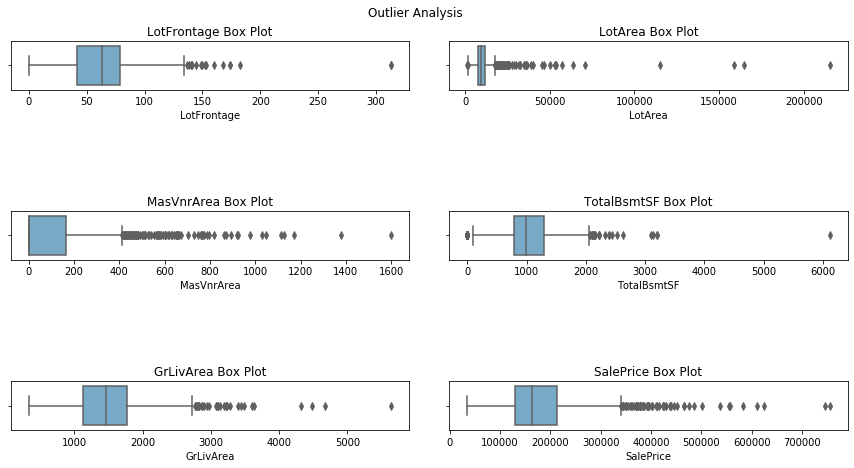

Observations:

LotFrontage:
- We can see that there are few outliers in the upper range for 'LotFrontage'.
- The mean of the feature lies aroun 60.


LotArea:
- There are many outliers and few extreme outliers in the upper range.
- Most value lies in the lower range.


MasVnrArea:
- There are many outliers between 400 and 800 and few extreme outliers in the upper range.
- Most of the value lies between the range of 0 to 180.


TotalBsmtSF:
- The mean of the TotalBsmtSF lies in ~1000.
- We can observe an extreme outlier above 6000.


GrLivArea:
- Maximum values lies in the range of 600 - 2500.
- There are around 4 extreme outliers with many normal outliers.


SalePrice:
- We can observe that the SalePrice lies in the range of 50,000 - 3,50,000.
- There are many outliers with two extreme outliers.


In [10]:
# Function for box plotting
def boxPlotAnalysis(df, cols):
    
    # Calculating the number of rows for subplot
    col_len = len(cols)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting parameters for plot
    plt.figure(figsize=(15, 6))
    plt.suptitle("Outlier Analysis")
    plt.subplots_adjust(top = 0.90, bottom=0.0, hspace=2.5, wspace=0.1)
    j = 0
    for i in enumerate(cols):
        # For plotting Box plot
        j = j + 1
        plt.subplot(subplot_rows, 2, j)
        sns.boxplot(x =df[i[1]], palette="Blues")
        title = i[1] + ' Box Plot'
        # Setting labels
        plt.title(title)
        plt.xlabel(i[1])
    plt.show()
    
# Specifiying columns for outlier analysis
cols_for_outlier = ['LotFrontage', 'LotArea', 'MasVnrArea', 
                    'TotalBsmtSF', 'GrLivArea', 'SalePrice']
print("Displaying the box plots of the features from dataframe for Outlier Analysis:\n")
boxPlotAnalysis(sales_df, cols_for_outlier)

print('Observations:\n')
print("LotFrontage:")
print("- We can see that there are few outliers in the upper range for 'LotFrontage'.")
print("- The mean of the feature lies aroun 60.")
print("\n")
print("LotArea:")
print("- There are many outliers and few extreme outliers in the upper range.")
print("- Most value lies in the lower range.")
print("\n")
print("MasVnrArea:")
print("- There are many outliers between 400 and 800 and few extreme outliers in the upper range.")
print("- Most of the value lies between the range of 0 to 180.")
print("\n")
print("TotalBsmtSF:")
print("- The mean of the TotalBsmtSF lies in ~1000.")
print("- We can observe an extreme outlier above 6000.")
print("\n")
print("GrLivArea:")
print("- Maximum values lies in the range of 600 - 2500.")
print("- There are around 4 extreme outliers with many normal outliers.")
print("\n")
print("SalePrice:")
print("- We can observe that the SalePrice lies in the range of 50,000 - 3,50,000.")
print("- There are many outliers with two extreme outliers.")

### Step 4: Visualising the Data
- #### 4.1: Visualising Numeric Variables
- #### 4.2: Visualising Categorical Variables

-  #### Substep 4.1: Visualising Numeric Variables

In [11]:
# Describing the numeric columns to visualize
num_cols_vis = ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'SalePrice']

print("Describing the numeric columns to visualize:")
sales_df[num_cols_vis].describe()

Describing the numeric columns to visualize:


,LotArea,GrLivArea,GarageArea,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,472.980137,1057.429452,180921.195890
std,9981.264932,525.480383,213.804841,438.705324,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,334.500000,795.750000,129975.000000
50%,9478.500000,1464.000000,480.000000,991.500000,163000.000000
75%,11601.500000,1776.750000,576.000000,1298.250000,214000.000000
max,215245.000000,5642.000000,1418.000000,6110.000000,755000.000000


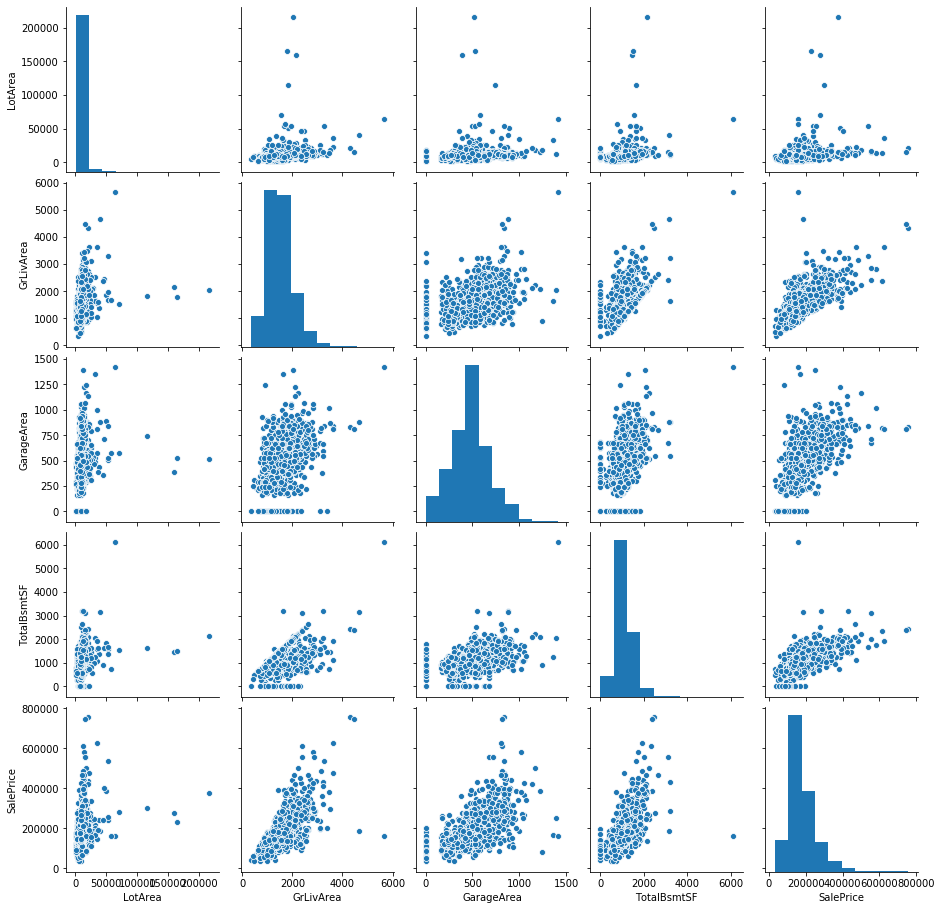

Observations:
- We can see that there is a good linear relationship between:
	 - 'GrLivArea' and 'SalePrice'.
	 - 'GarageArea' and 'SalePrice'.
	 - 'TotalBsmtSF' and 'SalePrice'.
	 - 'GrLivArea' and 'TotalBsmtSF'.


In [12]:
# Visualizing Numerical Variables

# Using pairplot to analyse the relationship between numeric variables
sns.pairplot(sales_df[num_cols_vis])
plt.show()

print("Observations:")
print("- We can see that there is a good linear relationship between:")
print("\t - 'GrLivArea' and 'SalePrice'.")
print("\t - 'GarageArea' and 'SalePrice'.")
print("\t - 'TotalBsmtSF' and 'SalePrice'.")
print("\t - 'GrLivArea' and 'TotalBsmtSF'.")

-  #### Substep 4.2: Visualising Categorical Variables

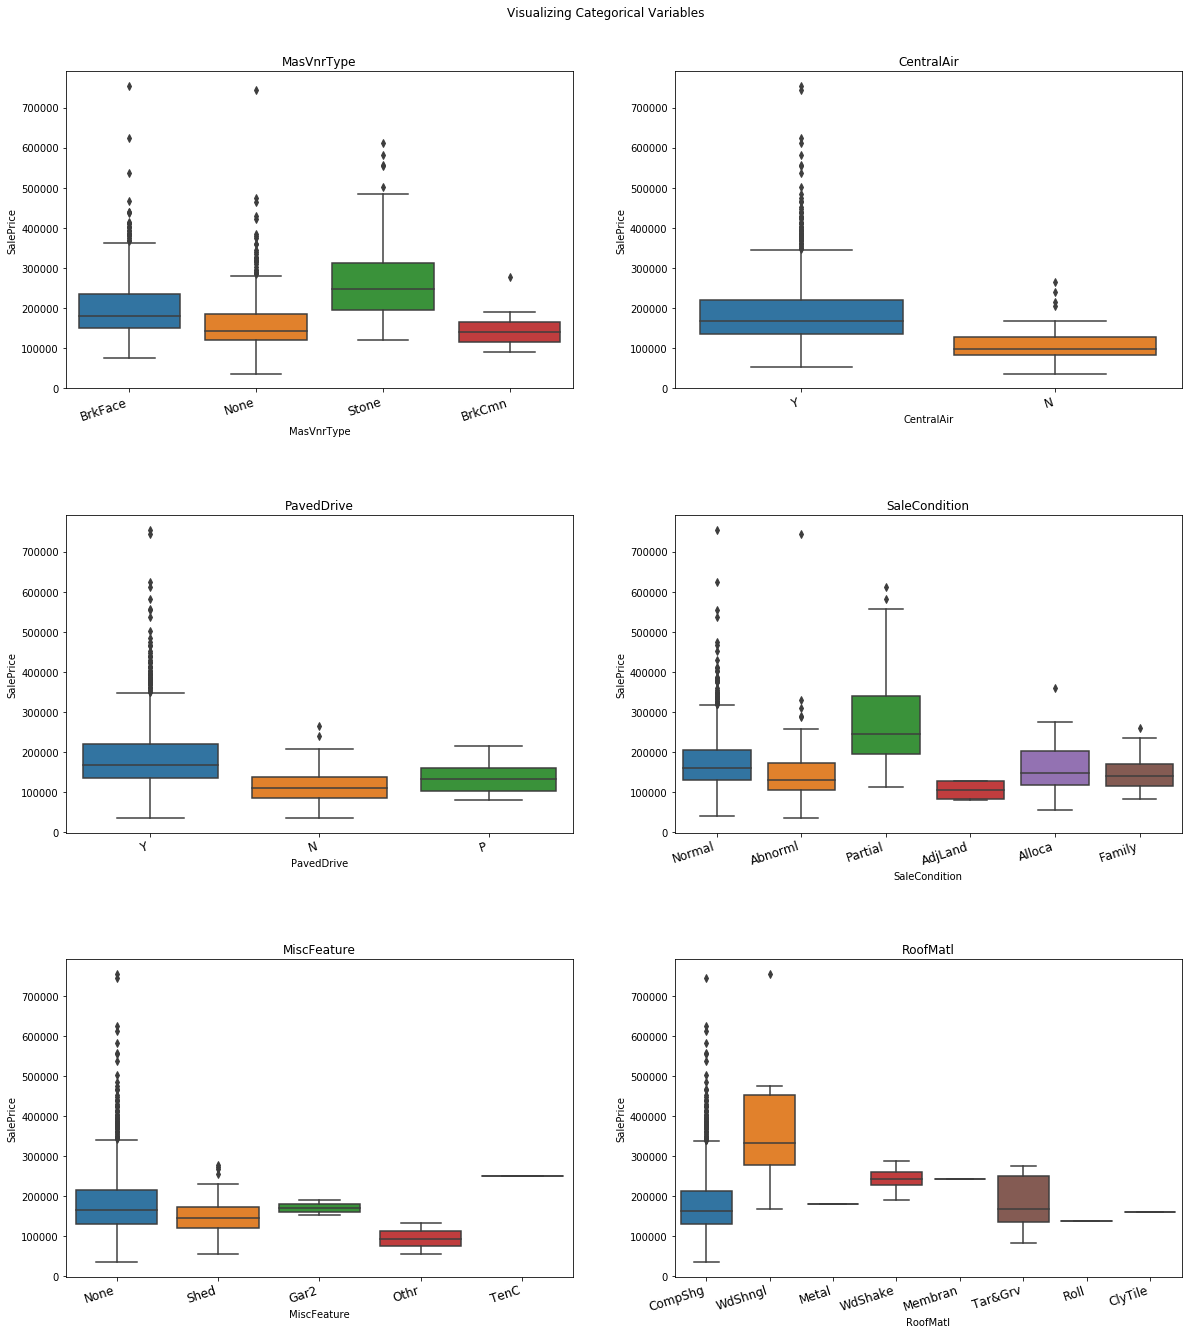

Observations:

'MasVnrType' vs 'SalePrice':
- The 'SalePrice' is high for houses with Stone as 'MasVnrType'.
- For BrkCmn and None categoriees of 'MasVnrType' types have low sales price


'CentralAir' vs 'SalePrice':
- We can observe that the 'SalePrice' is high for houses with air conditioning when compared to house without air conditioning.


'PavedDrive' vs 'SalePrice':
- The houses with Paved driveway have high 'SalePrice'
- The houses with no pavement have low 'SalePrice' with medium price for partial pavement.


'SaleCondition' vs 'SalePrice':
- Houses with 'SaleCondition' as Partial have high sales price.
- Houses with AdjLand as conditon have low sales price.


'MiscFeature' vs 'SalePrice':
- The category with Othr in MiscFeature has the lowest sales price.
- The mean of the categories None, Shed and Gar2 are approximately same but the range is different.


'RoofMatl' vs 'SalePrice':
- We can see that for WdShngl category the sale prices are high and for CompShg the sale prices

In [13]:
# Visualizing Categorical Variables

# Function to visualize categoriccal variables
def visCategVar(df, target, cols_to_vis):
    plt.figure(figsize=(20, 18))
    plt.suptitle('Visualizing Categorical Variables')
    plt.subplots_adjust(top = 0.93, bottom=0.0, hspace=0.4, wspace=0.2)
    
    # Calculating the number of rows for subplot
    col_len = len(cols_to_vis)
    subplot_rows = (col_len//2) + (col_len%2)
    
    for i in range(0, len(cols_to_vis)):
        plt.subplot(subplot_rows,2,i+1)
        sns.boxplot(x = cols_to_vis[i], y = target, data = df)
        # Setting title
        title = cols_to_vis[i]
        plt.title(title)
        # Setting configuration for label
        plt.xticks(
        rotation=18, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
        )
    plt.show()

# Setting categroical columns to visualize
cols_to_vis = ['MasVnrType', 'CentralAir', 'PavedDrive', 'SaleCondition', 'MiscFeature', 'RoofMatl']
visCategVar(sales_df, 'SalePrice', cols_to_vis)

# Observations
print('Observations:\n')
print("'MasVnrType' vs 'SalePrice':")
print("- The 'SalePrice' is high for houses with Stone as 'MasVnrType'.")
print("- For BrkCmn and None categoriees of 'MasVnrType' types have low sales price")
print("\n")
print("'CentralAir' vs 'SalePrice':")
print("- We can observe that the 'SalePrice' is high for houses with air conditioning when compared to house without air conditioning.")
print("\n")
print("'PavedDrive' vs 'SalePrice':")
print("- The houses with Paved driveway have high 'SalePrice'")
print("- The houses with no pavement have low 'SalePrice' with medium price for partial pavement.")
print("\n")
print("'SaleCondition' vs 'SalePrice':")
print("- Houses with 'SaleCondition' as Partial have high sales price.")
print("- Houses with AdjLand as conditon have low sales price.")
print("\n")
print("'MiscFeature' vs 'SalePrice':")
print("- The category with Othr in MiscFeature has the lowest sales price.")
print("- The mean of the categories None, Shed and Gar2 are approximately same but the range is different.")
print("\n")
print("'RoofMatl' vs 'SalePrice':")
print("- We can see that for WdShngl category the sale prices are high and for CompShg the sale prices are low.")
print("- For Tar&Grv the sale prices are in the middle range and for other categories the quantity is less and lies in middle range.")

### Step 5: Data Preparation
- #### 5.1: Converting categorical variables
- #### 5.2: Dropping heavily skewed categorical columns
- #### 5.3: Converting categorical variables to dummy variables
- #### 5.4: Converting year variables to age
- #### 5.5: Transformation of target feature

-  #### Substep 5.1: Converting categorical variables

In [14]:
# Replacing categorical numeric columns to categorical columns
sales_df = sales_df.replace({
                             "MSSubClass" : { 20 : "MSSC20", 30 : "MSSC30", 40 : "MSSC40", 45 : "MSSC45", 
                                              50 : "MSSC50", 60 : "MSSC60", 70 : "MSSC70", 75 : "MSSC75", 
                                              80 : "MSSC80", 85 : "MSSC85", 90 : "MSSC90", 120 : "MSSC120", 
                                              150 : "MSSC150", 160 : "MSSC160", 180 : "MSSC180", 190 : "MSSC190" },
                              "MoSold" : { 1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                           7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec" }
                            })

# Replacing ordered categorical features to numerical features
sales_df = sales_df.replace({
                             "BsmtExposure" : { "No Basement" : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4 },
                             "Functional" : { "Sal": 1, "Sev": 2, "Maj2" : 3, "Maj1" : 4, 
                                              "Mod" : 5, "Min2" : 6, "Min1" : 7, "Typ" : 8 },
                             "LandSlope" : { "Sev": 1, "Mod": 2, "Gtl" : 3 },
                             "PavedDrive" : { "N" : 0, "P" : 1, "Y" : 2 },
                             "LotShape" : { "IR3": 1, "IR2": 2, "IR1" : 3, 'Reg' : 4 },
                             "Utilities" : { "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4 }
                            })

# Function to convert similar categorical features to numerical features
def convCategCodeToNum(df, features, replace_obj):
    for feature in features:
        df[feature] = df[feature].replace(replace_obj)
        
# Converting quality related features
feat_conv_typ1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                'KitchenQual', 'GarageQual', 'GarageCond']
replace_obj_typ1 = {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}

convCategCodeToNum(sales_df, feat_conv_typ1, replace_obj_typ1)

# Converting basement related features
feat_conv_typ2 = ['BsmtFinType1', 'BsmtFinType2']
replace_obj_typ2 = {"No Basement": 0, "Unf": 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

convCategCodeToNum(sales_df, feat_conv_typ2, replace_obj_typ2)

-  #### Substep 5.2: Dropping heavily skewed categorical columns

In [15]:
# Function to return highly skewed categorical features
def getHighlySkewedCategFeat(df):
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighlySkewedCategFeat(sales_df)

print("Highly skewed categorical features:")
display(columnsToBeRemoved)

print('______________________________________________________________________________\n')

print("Dropping the highly skewed categorical features...")
sales_df.drop(columns=columnsToBeRemoved, inplace=True)

Highly skewed categorical features:


['Street',
 'Alley',
 'LandContour',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'MiscFeature',
 'SaleType']

______________________________________________________________________________

Dropping the highly skewed categorical features...


-  #### Substep 5.3: Converting categorical variables to dummy variables

In [16]:
# Selecting the categorical columns
cols_to_dummy = list(sales_df.select_dtypes(include=['object']).columns)
print("Converting the following form categorical variable into dummy/indicator variables...")
print(cols_to_dummy)

sales_df = pd.get_dummies(data=sales_df, columns=cols_to_dummy, drop_first = True)

print('______________________________________________________________________________\n')

# Displaying the resultant dataframe
print("Displaying the resultant dataframe after conversion:")
sales_df.head(5)

Converting the following form categorical variable into dummy/indicator variables...
['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold', 'SaleCondition']
______________________________________________________________________________

Displaying the resultant dataframe after conversion:


,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_MSSC160,MSSubClass_MSSC180,MSSubClass_MSSC190,MSSubClass_MSSC20,MSSubClass_MSSC30,MSSubClass_MSSC40,MSSubClass_MSSC45,MSSubClass_MSSC50,MSSubClass_MSSC60,MSSubClass_MSSC70,MSSubClass_MSSC75,MSSubClass_MSSC80,MSSubClass_MSSC85,MSSubClass_MSSC90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_No Basement,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,4,4,3,7,5,2003,2003,196.0,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,2003.0,2,548,2,0,61,0,0,0,0,0,2008,208500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,80.0,9600,4,4,3,6,8,1976,1976,0.0,3,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,1976.0,2,460,2,298,0,0,0,0,0,0,2007,181500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,3,68.0,11250,3,4,3,7,5,2001,2002,162.0,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,2001.0,2,608,2,0,42,0,0,0,0,0,2008,223500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

-  #### Substep 5.4: Converting year variables to age

In [17]:
# Converting Years to Number of years
sales_df['YearBuilt'] = 2020 - sales_df['YearBuilt']
sales_df['YearRemodAdd'] = 2020 - sales_df['YearRemodAdd']
sales_df['YrSold'] = 2020 - sales_df['YrSold']
sales_df['GarageYrBlt'] = 2020 - sales_df['GarageYrBlt']

-  #### Substep 5.5: Dropping the insignificant features

In [18]:
# Dropping the insignificant features

# Specifiying the insignificant columns
cols_insig = ['Id', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageYrBlt']
print("Insignficant columns: \n {0}\n".format(cols_insig))
print("- Dropping 'Id' as it is a identity feature.")
print("- Dropping 'TotalBsmtSF' and 'BsmtUnfSF' as already 'BsmtFinSF1' captures basement area related information.\n")
print("- Dropping 'GarageYrBlt' as it seems insignificant to the price prediction")

print("Dropping the insignificant columns...")
sales_df.drop(columns= cols_insig, inplace=True)

Insignficant columns: 
 ['Id', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageYrBlt']

- Dropping 'Id' as it is a identity feature.
- Dropping 'TotalBsmtSF' and 'BsmtUnfSF' as already 'BsmtFinSF1' captures basement area related information.

- Dropping 'GarageYrBlt' as it seems insignificant to the price prediction
Dropping the insignificant columns...


-  #### Substep 5.5: Transformation of target feature

Transformation of target feature:


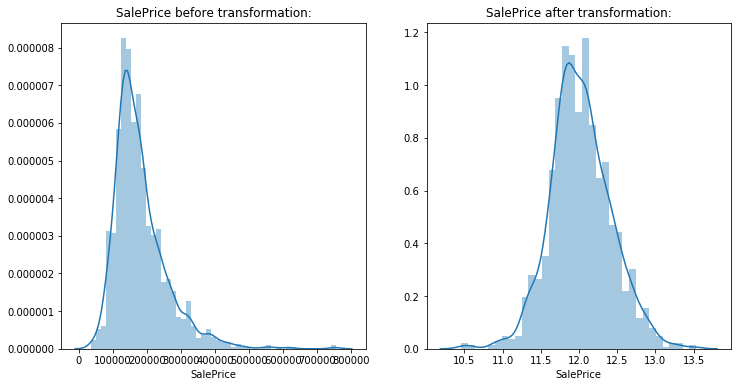

Observation:

- We can see that the distribution of data is not normal and skewed.
- Therefore, we cannot use it direclty for linear regression.
- We need to apply transformation function to convert the non normal distribution to normal.
- The second figure represents the target feature after applying log transformation for normalization.


In [19]:
print("Transformation of target feature:")

# Before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.distplot(sales_df['SalePrice'])
plt.title('SalePrice before transformation:')

# Applying transformation
sales_df['SalePrice'] = np.log1p(sales_df['SalePrice'])

# After transformation
plt.subplot(1,2,2)
sns.distplot(sales_df['SalePrice'])
plt.title('SalePrice after transformation:')
plt.show()

print("Observation:\n")
print("- We can see that the distribution of data is not normal and skewed.")
print("- Therefore, we cannot use it direclty for linear regression.")
print("- We need to apply transformation function to convert the non normal distribution to normal.")
print("- The second figure represents the target feature after applying log transformation for normalization.")

### Step 6: Splitting the Data into Training and Testing Sets

In [20]:
# Splitting the data into Training and Testing Sets using train_test_split from sklearn
# Our train-test ratio split is 70:30.
# We are setting the random seed so that the train and test set always have the same rows.
print("Splitting the data into Training and Testing Sets in the ratio of 70:30...")
df_train, df_test = train_test_split(sales_df, train_size = 0.7, test_size = 0.3, random_state = 100)

print('______________________________________________________________________________\n')

# Examining the number of rows in the splitted sets
print("Viewing the number of rows in the splitted sets.")
print("-Number of rows in the training set: {0}".format(df_train.shape[0]))
print("-Number of rows in the test set: {0}".format(df_test.shape[0]))

Splitting the data into Training and Testing Sets in the ratio of 70:30...
______________________________________________________________________________

Viewing the number of rows in the splitted sets.
-Number of rows in the training set: 1021
-Number of rows in the test set: 438


### Step 7: Rescaling the features
- #### 7.1: Rescaling using Standard Scaler
- #### 7.2: Analyzing Correlation

-  #### Substep 7.1: Rescaling using Standard Scaler

In [21]:
# We will use Standard Sclaer technique to rescale the required features
scaler = StandardScaler()

# Displaying the dataframe to check which features need scaling
print("Displaying the dataframe to check which features need scaling:")
display(df_train.head(5))

print('______________________________________________________________________________\n')

# Analyzing the dataframe
print("Analyzing the dataframe, we can see that the following columns need scaling:")
cols_to_scale = list(sales_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)
print(cols_to_scale)

print('______________________________________________________________________________\n')

# Apply min-max scaler to the required columns
print("Applying standard scaler to the required columns...")
# cols_to_scale.remove('SalePrice')
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

print('______________________________________________________________________________\n')

print("Displaying the dataframe after scaling:")
display(df_train.head(5))

Displaying the dataframe to check which features need scaling:


,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_MSSC160,MSSubClass_MSSC180,MSSubClass_MSSC190,MSSubClass_MSSC20,MSSubClass_MSSC30,MSSubClass_MSSC40,MSSubClass_MSSC45,MSSubClass_MSSC50,MSSubClass_MSSC60,MSSubClass_MSSC70,MSSubClass_MSSC75,MSSubClass_MSSC80,MSSubClass_MSSC85,MSSubClass_MSSC90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_No Basement,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,67.0,5604,4,4,3,5,6,95,70,0.0,3,3,1,3,468,1,0,3,864,0,0,864,1,0,1,0,2,1,3,5,8,0,0,0,2,0,0,96,0,0,0,0,12,11.492733,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
318,90.0,9900,4,4,2,7,5,27,27,256.0,4,3,4,6,987,1,0,5,1372,1274,0,2646,1,0,2,1,4,1,4,9,8,1,3,656,2,340,60,144,0,0,0,0,11,12.468441,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
239,52.0,8741,4,4,3,6,4,75,70,0.0,3,3,1,2,94,1,0,3,798,689,0,1487,0,0,1,1,3,1,3,7,8,1,1,220,2,0,140,0,0,0,0,0,10,11.635152,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

______________________________________________________________________________

Analyzing the dataframe, we can see that the following columns need scaling:
['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
______________________________________________________________________________

Applying standard scaler to the required columns...
______________________________________________________________________________

Displaying the d

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_MSSC160,MSSubClass_MSSC180,MSSubClass_MSSC190,MSSubClass_MSSC20,MSSubClass_MSSC30,MSSubClass_MSSC40,MSSubClass_MSSC45,MSSubClass_MSSC50,MSSubClass_MSSC60,MSSubClass_MSSC70,MSSubClass_MSSC75,MSSubClass_MSSC80,MSSubClass_MSSC85,MSSubClass_MSSC90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_No Basement,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.273876,-0.473765,0.692628,0.031311,0.228471,-0.779861,0.383154,1.524903,1.694350,-0.558025,-0.698260,-0.260816,-0.605626,-0.279557,0.043512,-0.278494,-0.293313,-1.179071,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.776063,-0.935650,0.230106,-0.925422,-2.366798,-2.217786,0.293828,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.134653,-1.335436,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
318,0.942770,-0.056845,0.692628,0.031311,-3.305904,0.649651,-0.533005,-0.717033,-0.390956,0.809137,1.053395,-0.260816,2.146648,1.140483,1.160345,-0.278494,-0.293313,0.873498,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0.741868,1.556976,0.230106,0.623522,1.645101,0.867506,0.293828,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0

-  #### Substep 7.2: Analyzing Correlation

In [22]:
print("Analyzing the correlation:\n")
corr_x_train = df_train.corr().unstack().drop_duplicates()

print("Displaying the maximum correlation pairs (< 0.7 and > 0.7):")
display(corr_x_train[((corr_x_train > 0.7) & (corr_x_train < 1)) | ((corr_x_train > -1.0) & (corr_x_train < -0.7))])

print("From the correlation analysis, we can see that there are many pairs with very high correlation.")
print("We can drop columns based on this analysis.")

Analyzing the correlation:

Displaying the maximum correlation pairs (< 0.7 and > 0.7):


OverallQual          ExterQual                   0.717270
                     SalePrice                   0.811194
ExterQual            KitchenQual                 0.721145
BsmtFinType2         BsmtFinSF2                  0.783770
2ndFlrSF             HouseStyle_1Story          -0.775245
                     HouseStyle_2Story           0.807479
GrLivArea            TotRmsAbvGrd                0.808463
KitchenAbvGr         MSSubClass_MSSC90           0.723208
Fireplaces           FireplaceQu_No Fireplace   -0.899500
GarageCars           GarageArea                  0.890243
MSSubClass_MSSC20    HouseStyle_1Story           0.750408
MSSubClass_MSSC45    HouseStyle_1.5Unf           0.918955
MSSubClass_MSSC60    HouseStyle_2Story           0.745576
MSSubClass_MSSC75    HouseStyle_2.5Unf           0.780746
MSSubClass_MSSC80    HouseStyle_SLvl             0.944062
MSSubClass_MSSC85    HouseStyle_SFoyer           0.755390
MSZoning_FV          Neighborhood_Somerst        0.859345
MSZoning_RL   

From the correlation analysis, we can see that there are many pairs with very high correlation.
We can drop columns based on this analysis.


In [23]:
# Setting columns to remove due to correlation
cols_to_rem_corr = ['1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'FireplaceQu_No Fireplace', 
                    'GarageType_No Garage', 'GarageCars', 'HouseStyle_1.5Unf', 'HouseStyle_SLvl', 
                    'Neighborhood_Somerst', 'RoofStyle_Hip', 'ExterQual', 
                    'KitchenAbvGr', 'MSSubClass_MSSC20', 'MSSubClass_MSSC45', 'MSSubClass_MSSC75',
                    'MSSubClass_MSSC60', 'MSSubClass_MSSC80', 'MSSubClass_MSSC85', 'MSZoning_RM', 
                    'MasVnrType_None', 'Foundation_PConc', 'BsmtQual_No Basement', 'BsmtQual_4', 
                    'GarageType_Detchd', 'GarageFinish_No Garage', 'Fence_No Fence', 'Exterior2nd_Wd Sdng',
                    'Exterior2nd_BrkFace','Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 
                    'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd'
                   ]
print("From the above analysis, we got {0} features which are highly correlated. They are: \n\n{1}".format(len(cols_to_rem_corr), cols_to_rem_corr))

print('______________________________________________________________________________\n')

# Dropping the columns from train data and test data
print("Dropping the columns...")
df_train = df_train.drop(columns=cols_to_rem_corr)

From the above analysis, we got 34 features which are highly correlated. They are: 

['1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'FireplaceQu_No Fireplace', 'GarageType_No Garage', 'GarageCars', 'HouseStyle_1.5Unf', 'HouseStyle_SLvl', 'Neighborhood_Somerst', 'RoofStyle_Hip', 'ExterQual', 'KitchenAbvGr', 'MSSubClass_MSSC20', 'MSSubClass_MSSC45', 'MSSubClass_MSSC75', 'MSSubClass_MSSC60', 'MSSubClass_MSSC80', 'MSSubClass_MSSC85', 'MSZoning_RM', 'MasVnrType_None', 'Foundation_PConc', 'BsmtQual_No Basement', 'BsmtQual_4', 'GarageType_Detchd', 'GarageFinish_No Garage', 'Fence_No Fence', 'Exterior2nd_Wd Sdng', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd']
______________________________________________________________________________

Dropping the columns...


### Step 8: Building a linear model
-  #### Substep 8.1: Dividing into X and Y sets for the model building
-  #### Substep 8.2: Variable selection using RFE (Recursive Feature Elimination)
-  #### Substep 8.3: Building model using plain linear regression

-  #### Substep 8.1: Dividing into X and Y sets for the model building

In [24]:
# Splitting the train data into y_train and X_train
y_train = df_train.pop('SalePrice')
X_train = df_train

-  #### Substep 8.2: Variable selection using RFE (Recursive Feature Elimination)

In [25]:
# Using RFE and LinearRegression from sklearn
cols_number_rfe = 35
print("There are {0} columns in the dataframe from which we need to perform variable selection.".format(len(X_train.columns)))
print("Manual approach will be time consuming for such great numbers.")
print("So we will first perform automated selection using RFE for the top {0} features.".format(cols_number_rfe))

print('______________________________________________________________________________\n')

# Fitting the model using linear regression
print("Fitting the model using linear regression...")
lm = LinearRegression()
lm.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Performing RFE
print("Running RFE(Recursive Feature Elimination)...")
rfe = RFE(lm, cols_number_rfe)
rfe = rfe.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Displaying columns selected using RFE
print('Displaying columns selected using RFE:')
cols_selfrom_rfe = X_train.columns[rfe.support_]
print(cols_selfrom_rfe)

There are 146 columns in the dataframe from which we need to perform variable selection.
Manual approach will be time consuming for such great numbers.
So we will first perform automated selection using RFE for the top 35 features.
______________________________________________________________________________

Fitting the model using linear regression...
______________________________________________________________________________

Running RFE(Recursive Feature Elimination)...
______________________________________________________________________________

Displaying columns selected using RFE:
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageArea',
       'MSSubClass_MSSC30', 'MSSubClass_MSSC70', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgTyp

In [26]:
# Filtering the train data with the features selected by RFE

X_train_rfe = X_train[cols_selfrom_rfe]

In [27]:
# Defining a common function for calculating model parameters and VIF (Variance Inflation Factor)

def modelDetBasedOnCols(cols_for_model):
    # Adding Constant
    X_train_lm = sm.add_constant(X_train[cols_for_model])
    
    # create a fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols_for_model].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols_for_model].values, i) for i in range(X_train[cols_for_model].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Return Model, VIF and X_train_lm
    return lr, vif, X_train_lm

In [28]:
# Running first model with all shortlisted features from RFE
lr_1, vif_1, X_train_lm = modelDetBasedOnCols(cols_selfrom_rfe)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(lr_1.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif_1)

# Analysing the linear model and VIF
print("Analysing the second linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- 'Exterior2nd_AsphShn' has the highest VIF-value, which means it is highly correlated. So let's drop this variable.")

Displaying the summary of the linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:                -389.43
No. Observations:                1021   AIC:                             848.9
Df Residuals:                     986   BIC:                             1021.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

,Features,VIF
26,Exterior2nd_AsphShn,inf
22,Exterior1st_AsphShn,inf
9,MSZoning_RL,7.08
33,SaleCondition_Normal,6.51
30,GarageType_Attchd,3.67
0,OverallQual,3.27
2,YearBuilt,3.25
20,HouseStyle_1Story,3.22
3,GrLivArea,2.48
34,SaleCondition_Partial,1.89


Analysing the second linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- 'Exterior2nd_AsphShn' has the highest VIF-value, which means it is highly correlated. So let's drop this variable.


In [29]:
# Running second model with all shortlisted features from RFE
cols_for_second_model = cols_selfrom_rfe[cols_selfrom_rfe != 'Exterior2nd_AsphShn']
lr_2, vif_2, X_train_lm = modelDetBasedOnCols(cols_for_second_model)

# Displaying the summary of the linear model
print("Displaying the summary of the second linear model:")
print(lr_2.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the second model:")
display(vif_2)

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the second linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'MSZoning_RL' is very high. So let's drop this variable.")

Displaying the summary of the second linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:                -389.43
No. Observations:                1021   AIC:                             848.9
Df Residuals:                     986   BIC:                             1021.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

,Features,VIF
9,MSZoning_RL,7.08
32,SaleCondition_Normal,6.51
29,GarageType_Attchd,3.67
0,OverallQual,3.27
2,YearBuilt,3.25
20,HouseStyle_1Story,3.22
3,GrLivArea,2.48
33,SaleCondition_Partial,1.89
4,GarageArea,1.85
27,BsmtQual_5,1.72


______________________________________________________________________________

Analysing the second linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'MSZoning_RL' is very high. So let's drop this variable.


In [30]:
# Running third model with all shortlisted features from RFE
cols_for_third_model = cols_for_second_model[cols_for_second_model != 'MSZoning_RL']
lr_3, vif_3, X_train_lm = modelDetBasedOnCols(cols_for_third_model)

# Displaying the summary of the linear model
print("Displaying the summary of the third linear model:")
print(lr_3.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the third model:")
display(vif_3)

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the third linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'Exterior1st_Stone' is very high. So let's drop this variable.")

Displaying the summary of the third linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:                -395.27
No. Observations:                1021   AIC:                             858.5
Df Residuals:                     987   BIC:                             1026.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

,Features,VIF
31,SaleCondition_Normal,3.52
28,GarageType_Attchd,3.45
0,OverallQual,3.17
2,YearBuilt,3.14
19,HouseStyle_1Story,3.05
3,GrLivArea,2.42
4,GarageArea,1.83
26,BsmtQual_5,1.72
32,SaleCondition_Partial,1.65
14,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the third linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'Exterior1st_Stone' is very high. So let's drop this variable.


In [31]:
# Running fourth model with all shortlisted features from RFE
cols_for_fourth_model = cols_for_third_model[cols_for_third_model != 'Exterior1st_Stone']
lr_4, vif_4, X_train_lm = modelDetBasedOnCols(cols_for_fourth_model)

# Displaying the summary of the fourth linear model
print("Displaying the summary of the fourth linear model:")
print(lr_4.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the fourth model
print("Displaying the VIF of the fourth model:")
display(vif_4)

print('______________________________________________________________________________\n')

# Analysing the fourth linear model and VIF
print("Analysing the fourth linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'MSZoning_RH' is very high. So let's drop this variable.")

Displaying the summary of the fourth linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     212.2
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:                -395.39
No. Observations:                1021   AIC:                             856.8
Df Residuals:                     988   BIC:                             1019.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

,Features,VIF
30,SaleCondition_Normal,3.48
27,GarageType_Attchd,3.44
0,OverallQual,3.17
2,YearBuilt,3.14
19,HouseStyle_1Story,3.02
3,GrLivArea,2.40
4,GarageArea,1.83
25,BsmtQual_5,1.72
31,SaleCondition_Partial,1.64
14,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the fourth linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'MSZoning_RH' is very high. So let's drop this variable.


In [32]:
# Running fifth model
cols_for_fifth_model = cols_for_fourth_model[cols_for_fourth_model != 'MSZoning_RH']
lr_5, vif_5, X_train_lm = modelDetBasedOnCols(cols_for_fifth_model)

# Displaying the summary of the linear model
print("Displaying the summary of the fifth linear model:")
print(lr_5.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the fifth model:")
display(vif_5)

print('______________________________________________________________________________\n')

# Analysing the fifth linear model and VIF
print("Analysing the fifth linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'RoofStyle_Mansard' is very high. So let's drop this variable.")

Displaying the summary of the fifth linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:                -395.66
No. Observations:                1021   AIC:                             855.3
Df Residuals:                     989   BIC:                             1013.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

,Features,VIF
29,SaleCondition_Normal,3.48
26,GarageType_Attchd,3.44
0,OverallQual,3.17
2,YearBuilt,3.13
18,HouseStyle_1Story,3.01
3,GrLivArea,2.38
4,GarageArea,1.82
24,BsmtQual_5,1.72
30,SaleCondition_Partial,1.64
13,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the fifth linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'RoofStyle_Mansard' is very high. So let's drop this variable.


In [33]:
# Running sixth model
cols_for_sixth_model = cols_for_fifth_model[cols_for_fifth_model != 'RoofStyle_Mansard']
lr_6, vif_6, X_train_lm = modelDetBasedOnCols(cols_for_sixth_model)

# Displaying the summary of the linear model
print("Displaying the summary of the sixth linear model:")
print(lr_6.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the sixth model:")
display(vif_6)

print('______________________________________________________________________________\n')

# Analysing the sixth linear model and VIF
print("Analysing the sixth linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'FireplaceQu_Po' is very high. So let's drop this variable.")

Displaying the summary of the sixth linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     226.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:                -396.08
No. Observations:                1021   AIC:                             854.2
Df Residuals:                     990   BIC:                             1007.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

,Features,VIF
28,SaleCondition_Normal,3.46
25,GarageType_Attchd,3.44
0,OverallQual,3.17
2,YearBuilt,3.13
18,HouseStyle_1Story,3.01
3,GrLivArea,2.36
4,GarageArea,1.82
23,BsmtQual_5,1.71
29,SaleCondition_Partial,1.64
13,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the sixth linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'FireplaceQu_Po' is very high. So let's drop this variable.


In [34]:
# Running seventh model
cols_for_seventh_model = cols_for_sixth_model[cols_for_sixth_model != 'FireplaceQu_Po']
lr_7, vif_7, X_train_lm = modelDetBasedOnCols(cols_for_seventh_model)

# Displaying the summary of the linear model
print("Displaying the summary of the seventh linear model:")
print(lr_7.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the seventh model:")
display(vif_7)

print('______________________________________________________________________________\n')

# Analysing the seventh linear model and VIF
print("Analysing the seventh linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'MSSubClass_MSSC70' is very high. So let's drop this variable.")

Displaying the summary of the seventh linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     234.2
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:                -396.65
No. Observations:                1021   AIC:                             853.3
Df Residuals:                     991   BIC:                             1001.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

,Features,VIF
27,SaleCondition_Normal,3.46
24,GarageType_Attchd,3.44
0,OverallQual,3.16
2,YearBuilt,3.12
18,HouseStyle_1Story,3.01
3,GrLivArea,2.36
4,GarageArea,1.82
23,BsmtQual_5,1.71
28,SaleCondition_Partial,1.64
13,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the seventh linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'MSSubClass_MSSC70' is very high. So let's drop this variable.


In [35]:
# Running eigth model
cols_for_eigth_model = cols_for_seventh_model[cols_for_seventh_model != 'MSSubClass_MSSC70']
lr_8, vif_8, X_train_lm = modelDetBasedOnCols(cols_for_eigth_model)

# Displaying the summary of the linear model
print("Displaying the summary of the eigth linear model:")
print(lr_8.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the eigth model:")
display(vif_8)

print('______________________________________________________________________________\n')

# Analysing the eigth linear model and VIF
print("Analysing the eigth linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'SaleCondition_Family' is very high. So let's drop this variable.")

Displaying the summary of the eigth linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     242.2
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:                -397.75
No. Observations:                1021   AIC:                             853.5
Df Residuals:                     992   BIC:                             996.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

,Features,VIF
23,GarageType_Attchd,3.44
26,SaleCondition_Normal,3.39
0,OverallQual,3.08
17,HouseStyle_1Story,3.00
2,YearBuilt,2.74
3,GrLivArea,2.36
4,GarageArea,1.82
22,BsmtQual_5,1.71
27,SaleCondition_Partial,1.63
12,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the eigth linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'SaleCondition_Family' is very high. So let's drop this variable.


In [36]:
# Running ninth model
cols_for_ninth_model = cols_for_eigth_model[cols_for_eigth_model != 'SaleCondition_Family']
lr_9, vif_9, X_train_lm = modelDetBasedOnCols(cols_for_ninth_model)

# Displaying the summary of the linear model
print("Displaying the summary of the ninth linear model:")
print(lr_9.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the eigth model:")
display(vif_9)

print('______________________________________________________________________________\n')

# Analysing the ninth linear model and VIF
print("Analysing the ninth linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'Neighborhood_MeadowV' is very high. So let's drop this variable.")

Displaying the summary of the ninth linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     250.8
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:                -398.88
No. Observations:                1021   AIC:                             853.8
Df Residuals:                     993   BIC:                             991.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

,Features,VIF
23,GarageType_Attchd,3.37
25,SaleCondition_Normal,3.31
0,OverallQual,3.07
17,HouseStyle_1Story,2.98
2,YearBuilt,2.71
3,GrLivArea,2.36
4,GarageArea,1.82
22,BsmtQual_5,1.71
26,SaleCondition_Partial,1.62
12,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the ninth linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'Neighborhood_MeadowV' is very high. So let's drop this variable.


In [37]:
# Running tenth model
cols_for_tenth_model = cols_for_ninth_model[cols_for_ninth_model != 'Neighborhood_MeadowV']
lr_10, vif_10, X_train_lm = modelDetBasedOnCols(cols_for_tenth_model)

# Displaying the summary of the linear model
print("Displaying the summary of the tenth linear model:")
print(lr_10.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the tenth model:")
display(vif_10)

print('______________________________________________________________________________\n')

# Analysing the tenth linear model and VIF
print("Analysing the tenth linear model and VIF:")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-values for all the features are less than 0.05 and the vif values are less than 5.")

Displaying the summary of the tenth linear model:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:                -400.42
No. Observations:                1021   AIC:                             854.8
Df Residuals:                     994   BIC:                             987.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

,Features,VIF
22,GarageType_Attchd,3.36
24,SaleCondition_Normal,3.31
0,OverallQual,3.01
16,HouseStyle_1Story,2.94
2,YearBuilt,2.71
3,GrLivArea,2.36
4,GarageArea,1.82
21,BsmtQual_5,1.71
25,SaleCondition_Partial,1.62
11,Neighborhood_NridgHt,1.61


______________________________________________________________________________

Analysing the tenth linear model and VIF:
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-values for all the features are less than 0.05 and the vif values are less than 5.


In [38]:
# Setting the final list of columns selected from RFE and manual approach
cols_final_sel = cols_for_tenth_model
# cols_final_sel = cols_selfrom_rfe
X_train_rfe = X_train_rfe[cols_final_sel]

In [39]:
# Function to return mean squared error and R2 score
def retMseR2ScoreFunc(id, y_true, y_pred):
    if (id == 'r2'):
        return round(r2_score(y_true, y_pred), 4)
    elif (id == 'mse'):
        return round(mean_squared_error(y_true, y_pred), 4)
    
# Function to display mean squared error and R2 score
def dispTrainTestScores(y_train, y_train_pred, y_test, y_test_pred):
    print("Train Data:")
    print("- Mean Squared Error: {0}".format(retMseR2ScoreFunc('mse', y_train, y_train_pred)))
    print("- R2 Score: {0}".format(retMseR2ScoreFunc('r2', y_train, y_train_pred)))
    print("\n")
    print("Test Data:")
    print("- Mean Squared Error: {0}".format(retMseR2ScoreFunc('mse', y_test, y_test_pred)))
    print("- R2 Score: {0}".format(retMseR2ScoreFunc('r2', y_test, y_test_pred)))

-  #### 8.3: Building model using plain linear regression

In [40]:
# linear regression
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

# Filtering the final columns from the test data
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])
df_test = df_test.drop(columns=cols_to_rem_corr)

# Dividing into X and Y sets for prediction
df_test_temp = df_test.copy(deep=True)
y_test = df_test_temp.pop('SalePrice')
X_test = df_test_temp

# Filtering the training set columns based on the predictor columns
X_test_rfe = X_test[cols_final_sel]

print("For model built using plain linear regression:\n")
dispTrainTestScores(y_train, lm.predict(X_train_rfe), y_test, lm.predict(X_test_rfe))

For model built using plain linear regression:

Train Data:
- Mean Squared Error: 0.1283
- R2 Score: 0.8717


Test Data:
- Mean Squared Error: 0.1439
- R2 Score: 0.8625


### Step 9: Building model using Ridge Regression

In [41]:
# Funcion to find the best estimator alpha using ridge regression
def findAlphaForRidgeRegression():
    # List of alphas
    params = {'alpha': [0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.0000001, 0.000001, 
                        0.00001, 0.0001, 0.0003, 0.0006, 0.0009, 
                        0.001, 0.003, 0.006, 0.009, 0.5, 1.0, 5.0, 
                        10.0, 20]}

    # Instantiate ridge regression
    ridge = Ridge()
    
    # Cross Validation
    no_of_folds = 5
    ridge_model_cv = GridSearchCV(estimator = ridge, 
                            param_grid = params, 
                            scoring= 'neg_mean_absolute_error', 
                            cv = no_of_folds, 
                            return_train_score=True,
                            verbose = 1)            
    ridge_model_cv.fit(X_train_rfe, y_train)
    
    # Display the mean train and test scores
    ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
    display(ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']))
    
    # Converting type of param_alpha
    ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

    # Plotting train and test scores against alpha
    plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
    plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()
    
    # Get the best estimator for lambda
    print("The best estimator for lambda: {0} \n".format(ridge_model_cv.best_estimator_.alpha))
    return ridge_model_cv.best_estimator_.alpha

# Function to build ridge regression
def buildRidgeRegression(alpha_ridge, X_train, y_train):
    
    # Building ridge with the given alpha
    ridge = Ridge(alpha=alpha_ridge)
    ridge.fit(X_train, y_train)
    
    # Display the train and test scores
    dispTrainTestScores(y_train, ridge.predict(X_train), y_test, ridge.predict(X_test_rfe))    
    
    # Put the Features and coefficienst in a dataframe
    ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 'Coeff (Absolute)': list(map(abs, ridge.coef_.round(4))) })
    ridge_df.reset_index(drop=True, inplace=True)
    print("\nThe list of features along with the coefficients sorted in the order of importance:")
    display(ridge_df.sort_values(by='Coeff (Absolute)', ascending=False)[['Features', 'Coefficient']])

Finding the best estimator for ridge regression:

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,1,-0.241613,-0.247762,1
15,0.5,-0.241499,-0.248039,2
14,0.009,-0.241320,-0.248404,3
17,5,-0.243383,-0.248406,4
13,0.006,-0.241319,-0.248407,5
12,0.003,-0.241317,-0.248410,6
11,0.001,-0.241316,-0.248412,7
10,0.0009,-0.241316,-0.248412,8
9,0.0006,-0.241316,-0.248412,9
8,0.0003,-0.241316,-0.248413,10


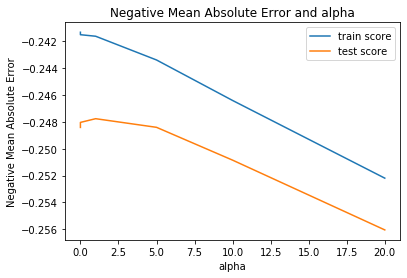

The best estimator for lambda: 1.0 



In [42]:
# Finding the best estimator for ridge regression
print("Finding the best estimator for ridge regression:\n")
alpha_ridge = findAlphaForRidgeRegression()

In [43]:
# Building the ridge regression with best estimator
print("Building the ridge regression with best estimator:\n")
buildRidgeRegression(alpha_ridge, X_train_rfe, y_train)

Building the ridge regression with best estimator:

Train Data:
- Mean Squared Error: 0.1287
- R2 Score: 0.8713


Test Data:
- Mean Squared Error: 0.1433
- R2 Score: 0.8631

The list of features along with the coefficients sorted in the order of importance:


,Features,Coefficient
14,BldgType_Twnhs,-0.5268
8,Neighborhood_Crawfor,0.5020
7,Neighborhood_ClearCr,0.5012
18,Exterior1st_BrkComm,-0.4962
20,Foundation_Slab,-0.4230
17,Exterior1st_AsphShn,-0.4085
12,Neighborhood_StoneBr,0.3888
11,Neighborhood_NridgHt,0.3878
10,Neighborhood_NoRidge,0.3440
3,GrLivArea,0.3363


### Step 10: Building model using Lasso Regression

In [44]:
# Funcion to find the best estimator alpha using lasso regression
def findAlphaForLassoRegression():
    
    # Instantiate Lasso Regression
    lasso = Lasso()

    # List of alphas
    params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

    # Cross Validation
    no_of_folds = 5
    lasso_model_cv = GridSearchCV(estimator = lasso,                         
                            param_grid = params, 
                            scoring= 'neg_mean_absolute_error', 
                            cv = no_of_folds, 
                            return_train_score=True,
                            verbose = 1)            

    lasso_model_cv.fit(X_train_rfe, y_train)
    
    # Display the mean train and test scores    
    lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
    display(lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']))
    
    # Converting type of param_alpha
    lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

    # Plotting train and test scores against alpha
    plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
    plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')

    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()
    
    # Get the best estimator for lambda
    print("The best estimator for lambda: {0} \n".format(lasso_model_cv.best_estimator_.alpha))
    return lasso_model_cv.best_estimator_.alpha

def buildLassoRegression(alpha_lasso, X_train, y_train, X_test = X_test_rfe):
    
    # Building lasso with the given alpha
    lasso = Lasso(alpha=alpha_lasso)        
    lasso.fit(X_train, y_train) 
    
    # Display the train and test scores
    dispTrainTestScores(y_train, lasso.predict(X_train), y_test, lasso.predict(X_test))
    
    # Put the shortlisted Features and coefficienst in a dataframe
    lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 'Coeff (Absolute)': list(map(abs, lasso.coef_.round(4)))})
    lasso_df.reset_index(drop=True, inplace=True)
    print("\nThe list of features along with the coefficients sorted in the order of importance:")
    display(lasso_df.sort_values(by='Coeff (Absolute)', ascending=False)[['Features', 'Coefficient']])

Finding the best estimator for lasso regression:

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.241592,-0.248002,1
3,0.0004,-0.241506,-0.248040,2
2,0.0003,-0.241437,-0.248116,3
5,0.001,-0.242353,-0.248175,4
1,0.0002,-0.241380,-0.248204,5
0,0.0001,-0.241337,-0.248300,6
6,0.002,-0.244414,-0.250417,7
7,0.003,-0.247902,-0.254151,8
8,0.004,-0.252251,-0.257987,9
9,0.005,-0.256042,-0.261147,10


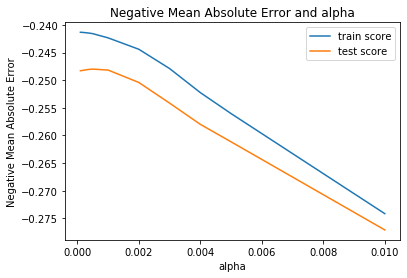

The best estimator for lambda: 0.0005 



In [45]:
# Finding the best estimator for lasso regression
print("Finding the best estimator for lasso regression:\n")
alpha_lasso = findAlphaForLassoRegression()

In [46]:
# Building the lasso regression with best estimator
print("Building the lasso regression with best estimator:\n")
buildLassoRegression(alpha_lasso, X_train_rfe, y_train)

Building the lasso regression with best estimator:

Train Data:
- Mean Squared Error: 0.1289
- R2 Score: 0.8711


Test Data:
- Mean Squared Error: 0.1433
- R2 Score: 0.8631

The list of features along with the coefficients sorted in the order of importance:


,Features,Coefficient
14,BldgType_Twnhs,-0.5250
8,Neighborhood_Crawfor,0.5007
7,Neighborhood_ClearCr,0.4999
18,Exterior1st_BrkComm,-0.4918
20,Foundation_Slab,-0.4162
11,Neighborhood_NridgHt,0.3818
12,Neighborhood_StoneBr,0.3713
3,GrLivArea,0.3362
10,Neighborhood_NoRidge,0.3330
19,Exterior1st_BrkFace,0.3283


### Step 11: Final Words
- #### 11.1: Results from Ridge Regression
- #### 11.2: Results from Lasso Regression
- #### 11.3: Conclusion

- #### 11.1: Results from Ridge Regression

In [47]:
print("The optimal value of lambda for ridge regression is: {0}\n".format(alpha_ridge))

print("We obtained the following scores for test and train data using ridge regression:\n")
buildRidgeRegression(alpha_ridge, X_train_rfe, y_train)

The optimal value of lambda for ridge regression is: 1.0

We obtained the following scores for test and train data using ridge regression:

Train Data:
- Mean Squared Error: 0.1287
- R2 Score: 0.8713


Test Data:
- Mean Squared Error: 0.1433
- R2 Score: 0.8631

The list of features along with the coefficients sorted in the order of importance:


,Features,Coefficient
14,BldgType_Twnhs,-0.5268
8,Neighborhood_Crawfor,0.5020
7,Neighborhood_ClearCr,0.5012
18,Exterior1st_BrkComm,-0.4962
20,Foundation_Slab,-0.4230
17,Exterior1st_AsphShn,-0.4085
12,Neighborhood_StoneBr,0.3888
11,Neighborhood_NridgHt,0.3878
10,Neighborhood_NoRidge,0.3440
3,GrLivArea,0.3363


- #### 11.2: Results from Lasso Regression

In [48]:
print("The optimal value of lambda for lasso regression is: {0}\n".format(alpha_lasso))

print("We obtained the following scores for test and train data using lasso regression:\n")
buildLassoRegression(alpha_lasso, X_train_rfe, y_train)

The optimal value of lambda for lasso regression is: 0.0005

We obtained the following scores for test and train data using lasso regression:

Train Data:
- Mean Squared Error: 0.1289
- R2 Score: 0.8711


Test Data:
- Mean Squared Error: 0.1433
- R2 Score: 0.8631

The list of features along with the coefficients sorted in the order of importance:


,Features,Coefficient
14,BldgType_Twnhs,-0.5250
8,Neighborhood_Crawfor,0.5007
7,Neighborhood_ClearCr,0.4999
18,Exterior1st_BrkComm,-0.4918
20,Foundation_Slab,-0.4162
11,Neighborhood_NridgHt,0.3818
12,Neighborhood_StoneBr,0.3713
3,GrLivArea,0.3362
10,Neighborhood_NoRidge,0.3330
19,Exterior1st_BrkFace,0.3283


- #### 11.3: Conclusion

In [49]:
print('Conclusion: \n')

print("Results from Ridge regression: \n")
print("- Optimal value of alpha for ridge - {0}\n".format(alpha_ridge))
print("- Train:")
print("\t - R2 score - 0.8713")
print("\t - MSE - 0.1287")

print("- Test:")
print("\t - R2 score - 0.8631")
print("\t - MSE - 0.1433")

print('______________________________________________________________________________\n')

print("Results from Lasso regression: \n")
print("- Optimal value of alpha for lasso - {0}\n".format(alpha_lasso))
print("- Train:")
print("\t - R2 score - 0.8711")
print("\t - MSE - 0.1289")

print("- Test:")
print("\t - R2 score - 0.8631")
print("\t - MSE - 0.1433")

print('______________________________________________________________________________\n')

print("- We can observe that the performance of both ridge and lasso regression is good and almost similar to each other with very minimal differences in the MSE and R2 Score.")
print("- One of the main advantages of lasso regression is that it helps in feature reduction by reducing the coefficients down to zero. But, in our scenario, the lasso did not reduce any coefficients to zero. ")
print("- So, as lasso regression is computationally intensive and has not reduced any coefficients to zero in our case, we will choose ridge regression as it is less computationally intensive than Lasso.")

print('______________________________________________________________________________\n')
print("Therefore, the top features which affect the price are: ")
print("- BldgType_Twnhs")
print("- Neighborhood_Crawfor")
print("- Neighborhood_ClearCr")
print("- Exterior1st_BrkComm")
print("- Foundation_Slab")

Conclusion: 

Results from Ridge regression: 

- Optimal value of alpha for ridge - 1.0

- Train:
	 - R2 score - 0.8713
	 - MSE - 0.1287
- Test:
	 - R2 score - 0.8631
	 - MSE - 0.1433
______________________________________________________________________________

Results from Lasso regression: 

- Optimal value of alpha for lasso - 0.0005

- Train:
	 - R2 score - 0.8711
	 - MSE - 0.1289
- Test:
	 - R2 score - 0.8631
	 - MSE - 0.1433
______________________________________________________________________________

- We can observe that the performance of both ridge and lasso regression is good and almost similar to each other with very minimal differences in the MSE and R2 Score.
- One of the main advantages of lasso regression is that it helps in feature reduction by reducing the coefficients down to zero. But, in our scenario, the lasso did not reduce any coefficients to zero. 
- So, as lasso regression is computationally intensive and has not reduced any coefficients to zero in our cas

## Assignment Part - II

#### 1. Changes in the model if the value of alpha for both ridge and lasso are doubled.

In [50]:
# Building the ridge regression with doubled alpha
print("Building the ridge regression with doubled alpha:\n")
alpha_ridge_doubled = 2 * alpha_ridge

print("The value of best estimator alpha for ridge: {0}\n".format(alpha_ridge))
print("The doubled value of alpha for ridge: {0}\n".format(alpha_ridge_doubled))

buildRidgeRegression(alpha_ridge_doubled, X_train_rfe, y_train)

Building the ridge regression with doubled alpha:

The value of best estimator alpha for ridge: 1.0

The doubled value of alpha for ridge: 2.0

Train Data:
- Mean Squared Error: 0.1292
- R2 Score: 0.8708


Test Data:
- Mean Squared Error: 0.1429
- R2 Score: 0.8634

The list of features along with the coefficients sorted in the order of importance:


,Features,Coefficient
14,BldgType_Twnhs,-0.5048
8,Neighborhood_Crawfor,0.4827
7,Neighborhood_ClearCr,0.4769
20,Foundation_Slab,-0.4030
18,Exterior1st_BrkComm,-0.3749
11,Neighborhood_NridgHt,0.3689
12,Neighborhood_StoneBr,0.3494
3,GrLivArea,0.3375
10,Neighborhood_NoRidge,0.3252
19,Exterior1st_BrkFace,0.3222


In [51]:
# Building the lasso regression with doubled alpha
print("Building the lasso regression with doubled alpha:\n")
alpha_lasso_doubled = 2 * alpha_lasso

print("The value of best estimator alpha for lasso: {0}\n".format(alpha_lasso))
print("The doubled value of alpha for lasso: {0}\n".format(alpha_lasso_doubled))

buildLassoRegression(alpha_lasso_doubled, X_train_rfe, y_train)

Building the lasso regression with doubled alpha:

The value of best estimator alpha for lasso: 0.0005

The doubled value of alpha for lasso: 0.001

Train Data:
- Mean Squared Error: 0.1303
- R2 Score: 0.8697


Test Data:
- Mean Squared Error: 0.1432
- R2 Score: 0.8632

The list of features along with the coefficients sorted in the order of importance:


,Features,Coefficient
14,BldgType_Twnhs,-0.4988
8,Neighborhood_Crawfor,0.4780
7,Neighborhood_ClearCr,0.4719
20,Foundation_Slab,-0.3930
11,Neighborhood_NridgHt,0.3541
3,GrLivArea,0.3376
19,Exterior1st_BrkFace,0.3146
12,Neighborhood_StoneBr,0.3061
10,Neighborhood_NoRidge,0.3005
2,YearBuilt,-0.2833


#### 2. Building a model excluding the five most important predictor variables

In [52]:
cols_in_model = list(X_train_rfe.columns)
top_5_lasso = ['BldgType_Twnhs', 'Neighborhood_Crawfor', 'Neighborhood_ClearCr', 'Exterior1st_BrkComm', 'Foundation_Slab']
cols_wo_top5 = list(set(cols_in_model) - set(top_5_lasso))

print("Columns remaining after removing top 5 features: \n {0}\n".format(cols_wo_top5))

X_train_wotop5 = X_train_rfe[cols_wo_top5]
X_test_wotop5 = X_test_rfe[cols_wo_top5]

buildLassoRegression(alpha_lasso, X_train_wotop5, y_train, X_test_wotop5)

Columns remaining after removing top 5 features: 
 ['BsmtQual_5', 'MoSold_May', 'SaleCondition_Partial', 'Neighborhood_NoRidge', 'GrLivArea', 'YearBuilt', 'OverallCond', 'Neighborhood_IDOTRR', 'GarageType_Attchd', 'HouseStyle_1Story', 'MSSubClass_MSSC30', 'Exterior1st_BrkFace', 'BldgType_TwnhsE', 'OverallQual', 'SaleCondition_Normal', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'MSZoning_FV', 'Neighborhood_Veenker', 'GarageArea', 'Exterior1st_AsphShn']

Train Data:
- Mean Squared Error: 0.1543
- R2 Score: 0.8457


Test Data:
- Mean Squared Error: 0.1529
- R2 Score: 0.8539

The list of features along with the coefficients sorted in the order of importance:


,Features,Coefficient
4,GrLivArea,0.3597
11,Exterior1st_BrkFace,0.3030
13,OverallQual,0.3016
3,Neighborhood_NoRidge,0.2724
16,Neighborhood_StoneBr,0.2686
7,Neighborhood_IDOTRR,-0.2591
15,Neighborhood_NridgHt,0.2578
18,Neighborhood_Veenker,0.2502
0,BsmtQual_5,0.2368
20,Exterior1st_AsphShn,-0.2330
